# Polynomial Regression

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv("FuelConsumptionCo2.csv")
selected_data = data[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]

In [19]:
msk = np.random.rand(len(data)) < 0.8
train_data = selected_data[msk]
test_data = selected_data[~msk]

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
x_train = np.asanyarray(train_data[["ENGINESIZE"]])
y_train = np.asanyarray(train_data[["CO2EMISSIONS"]])
x_test = np.asanyarray(test_data[["ENGINESIZE"]])
y_test = np.asanyarray(test_data[["CO2EMISSIONS"]])

In [21]:
poly = PolynomialFeatures(degree=2)
x_train_polynomial = poly.fit_transform(x_train)
regression = linear_model.LinearRegression()
y_train_predict = regression.fit(x_train_polynomial, y_train)

In [22]:
print("Co-efficients : {}".format(regression.coef_))
print("Intercept : {}".format(regression.intercept_))

Co-efficients : [[ 0.         51.13235363 -1.6456192 ]]
Intercept : [106.51539925]
Co-efficients : [[ 0.         51.13235363 -1.6456192 ]]
Intercept : [106.51539925]


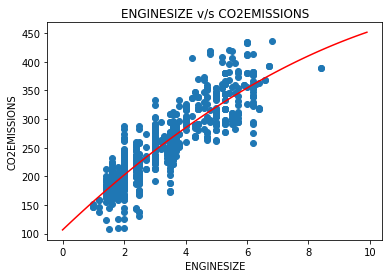

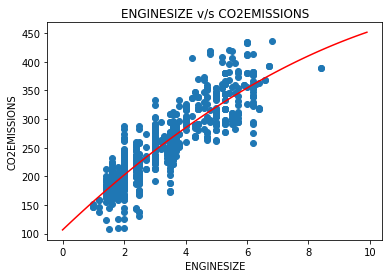

In [23]:
plt.scatter(train_data.ENGINESIZE, train_data.CO2EMISSIONS)
X = np.arange(0, 10, 0.1)
Y = regression.intercept_[0] + regression.coef_[0][1] * X + regression.coef_[0][2] * np.power(X,2)
plt.plot(X, Y, "-r")
plt.title("ENGINESIZE v/s CO2EMISSIONS")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [24]:
from sklearn.metrics import r2_score
x_test_polynomial = poly.fit_transform(x_test)
y_test_predict = regression.predict(x_test_polynomial)
print("Mean absolute error : {0:.2f}".format(np.mean(y_test_predict - y_test)))
print("Residual sum of squares (MSE) : {0:.2f}".format(np.mean((y_test_predict - y_test) ** 2)))
print("R2-score : {0:.2f}".format(r2_score(y_test, y_test_predict)))

Mean absolute error : -1.65
Residual sum of squares (MSE) : 983.90
R2-score : 0.76
Mean absolute error : -1.65
Residual sum of squares (MSE) : 983.90
R2-score : 0.76
